In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [18]:
try:
    data = pd.read_csv('TitanicDataset.csv')
    print(data.head())
except Exception as e:
    print(e)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
try:
    print("Before encoding:", data.columns)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})#one hot encoding for embarked column
    data = pd.get_dummies(data, columns=['Embarked'], drop_first=True) 
    print("Columns after encoding:", data.columns)
except Exception as e:
    print(e)

Before encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns after encoding: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


C:\Users\Isha\AppData\Local\Temp\ipykernel_11692\936741485.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Isha\AppData\Local\Temp\ipykernel_11692\936741485.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [20]:
try:
    X = data[['Age', 'Fare', 'Sex'] + [col for col in data.columns if 'Embarked' in col]] #features
    y = data['Pclass'] #target variable
    y_one_hot = pd.get_dummies(y, prefix='Pclass')
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    X_train[['Embarked_Q', 'Embarked_S']] = X_train[['Embarked_Q', 'Embarked_S']].astype(int)
    X_test[['Embarked_Q', 'Embarked_S']] = X_test[['Embarked_Q', 'Embarked_S']].astype(int)
    print(X_train[['Embarked_Q', 'Embarked_S']].head())
except Exception as e:
    print(e)

X_train shape: (712, 5)
X_test shape: (179, 5)
y_train shape: (712, 3)
y_test shape: (179, 3)
     Embarked_Q  Embarked_S
331           0           1
733           0           1
382           0           1
704           0           1
813           0           1


In [21]:
try:
    # Let's scale only the numeric columns
    scaler = StandardScaler()
    X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
    X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])
    print(X_train.head())
except Exception as e:
    print(e)


          Age      Fare  Sex  Embarked_Q  Embarked_S
331  1.253641 -0.078684    0           0           1
733 -0.477284 -0.377145    0           0           1
382  0.215086 -0.474867    0           0           1
704 -0.246494 -0.476230    0           0           1
813 -1.785093 -0.025249    1           0           1


In [22]:
try:
    # Define the softmax function
    def softmax(scores):
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Example usage of the softmax function
    test_scores = np.array([[2.0, 1.0, 0.1]])
    result = softmax(test_scores)
    print("Softmax result:", result)

except Exception as e:
    print(f"An error occurred: {e}")


Softmax result: [[0.65900114 0.24243297 0.09856589]]


In [23]:
try:
    scores = np.array([[1.2, 0.9, 0.8], [1.1, 0.4, 1.2]])
    probs = softmax(scores)
    assert np.allclose(np.sum(probs, axis=1), 1)
    print(softmax(scores))
except Exception as e:
    print(e)
    


[[0.41474187 0.30724834 0.27800979]
 [0.38435576 0.19086542 0.42477881]]


In [24]:
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss between true labels and predicted probabilities.
    
    Args:
    y_true (np.array): True labels (one-hot encoded).
    y_pred (np.array): Predicted probabilities.
    
    Returns:
    float: The cross-entropy loss.
    """
    # Ensure numerical stability by clipping predicted probabilities
    y_pred = np.clip(y_pred, 1e-12, 1.0)
    
    # Compute the cross-entropy loss
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

# Example usage
try:
    y_true = np.array([[1, 0, 0], [0, 1, 0]])
    y_pred = np.array([[0.7, 0.2, 0.1], [0.2, 0.7, 0.1]])
    cost = cross_entropy_loss(y_true, y_pred)
    assert cost >= 0, "Test failed: Loss should be non-negative"
    print(cost)
except Exception as e:
    print(e)


0.35667494393873245


In [25]:
try:
    def compute_gradients(X, Y, probs):
        num_samples = X.shape[0]
        grad_W = np.dot(X.T, (probs - Y)) / num_samples
        grad_b = np.sum(probs - Y, axis=0, keepdims=True) / num_samples
        return grad_W, grad_b
except Exception as e:
    print(e)

In [26]:
try:
    X = np.random.randn(5, 3)  # Sample data
    Y = np.random.randint(0, 2, (5, 3)) 
    probs = np.random.rand(5, 3)  
    grad_W, grad_b = compute_gradients(X, Y, probs)
    assert grad_W.shape == (X.shape[1], Y.shape[1]), "Test failed: Gradient W has incorrect shape"
    assert grad_b.shape == (1, Y.shape[1]), "Test failed: Gradient b has incorrect shape"
    print("Gradient W:", grad_W.shape)
    print("Gradient b:", grad_b.shape)
except Exception as e:
    print(e)
    

Gradient W: (3, 3)
Gradient b: (1, 3)


In [27]:
try:
    def softmax_regression(X, Y, alpha=0.01, epochs=1000):
        # Initialize weights and bias
        W = np.random.randn(X.shape[1], Y.shape[1])
        b = np.zeros((1, Y.shape[1]))
        loss_history = []  # List to store the loss values

        # Training loop
        for epoch in range(epochs):
            scores = np.dot(X, W) + b
            probs = softmax(scores)  # Compute probabilities using softmax
            loss = cross_entropy_loss(Y, probs)  # Compute the loss
            loss_history.append(loss)

            # Compute gradients
            grad_W, grad_b = compute_gradients(X, Y, probs)

            # Update weights and bias
            W -= alpha * grad_W
            b -= alpha * grad_b

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        # Return the final weights, bias, and loss history
        return W, b, loss_history

except Exception as e:
    print(e)


In [28]:
try:
    scores = np.array([[1.2, 0.9, 0.8], [1.1, 0.4, 1.2]])
    probs = softmax(scores)
    assert np.allclose(np.sum(probs, axis=1), 1), "Test failed: Softmax probabilities don't sum to 1"
except Exception as e:
    print(e)

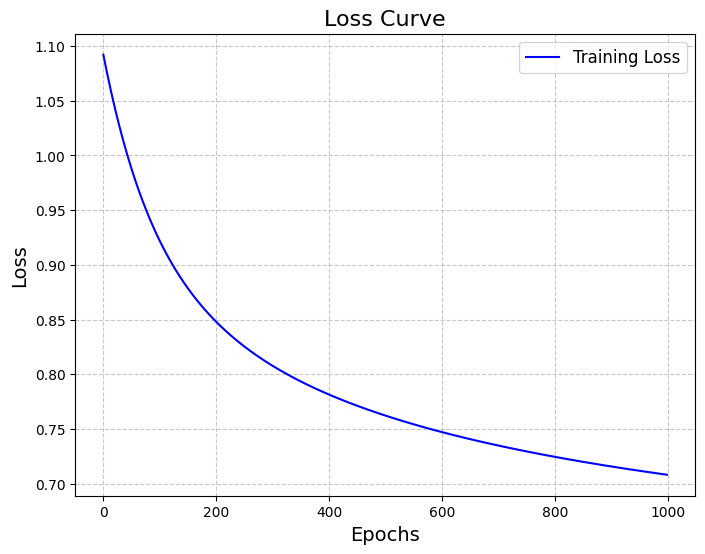

In [29]:
# Softmax function
def softmax(z):
    """
    Compute the softmax probabilities for each class.

    Args:
    - z (np.ndarray): Logits of shape (n_samples, n_classes).

    Returns:
    - np.ndarray: Softmax probabilities of shape (n_samples, n_classes).
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    """
    Compute the cross-entropy loss.

    Args:
    - y_true (np.ndarray): One-hot encoded true labels of shape (n_samples, n_classes).
    - y_pred (np.ndarray): Predicted probabilities of shape (n_samples, n_classes).

    Returns:
    - float: Average cross-entropy loss over all samples.
    """
    epsilon = 1e-10  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

# Softmax regression function
def softmax_regression(X, y, alpha=0.01, epochs=1000):
    """
    Perform softmax regression.

    Args:
    - X (np.ndarray): Feature matrix of shape (n_samples, n_features).
    - y (np.ndarray): One-hot encoded labels of shape (n_samples, n_classes).
    - alpha (float): Learning rate.
    - epochs (int): Number of iterations.

    Returns:
    - W (np.ndarray): Learned weights of shape (n_features, n_classes).
    - b (np.ndarray): Learned biases of shape (n_classes,).
    - loss_history (list): Loss recorded over epochs.
    """
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    # Initialize weights and biases
    W = np.random.randn(n_features, n_classes) * 0.01
    b = np.zeros(n_classes)

    loss_history = []

    for epoch in range(epochs):
        # Forward pass: compute logits and predictions
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)
        loss_history.append(loss)

        # Backward pass: compute gradients
        grad_W = np.dot(X.T, (y_pred - y)) / n_samples
        grad_b = np.sum(y_pred - y, axis=0) / n_samples

        # Update weights and biases
        W -= alpha * grad_W
        b -= alpha * grad_b

    return W, b, loss_history

# Function to plot the loss curve
def plot_loss_curve(loss_history):
    """
    Plot the loss curve.

    Args:
    - loss_history (list): List of loss values over epochs.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(loss_history, color='blue', label='Training Loss')
    plt.title('Loss Curve', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Main execution
try:
    # Ensure X_train and y_train are converted to NumPy arrays
    X_train_np = X_train.to_numpy()  # Convert to NumPy array
    y_train_np = y_train.to_numpy()  # Ensure one-hot encoded labels

    # Perform softmax regression
    W, b, loss_history = softmax_regression(X_train_np, y_train_np, alpha=0.01, epochs=1000)

    # Call the plot function
    plot_loss_curve(loss_history)
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [30]:
def predict(X, W, b):
    
    try:
        # Compute scores
        scores = np.dot(X, W) + b

        # Compute probabilities using softmax
        probs = softmax(scores)

        # Return the class with the highest probability
        return np.argmax(probs, axis=1)

    except Exception as e:
        print(f"An unexpected error occurred: {e}")


In [31]:
# Random test data
X_train = np.random.randn(100, 3)  # 100 samples, 3 features
W = np.random.randn(3, 3)         # 3 features, 3 classes
b = np.random.randn(1, 3)         # 1 bias per class

# Test the predict function
predictions = predict(X_train, W, b)

# Check the shape of the predictions
assert predictions.shape[0] == X_train.shape[0], "Mismatch: The number of predictions does not match the number of samples."

# If no assertion error, the test passed
print("test_predict passed!")


test_predict passed!


In [32]:
# Simulate some data (replace this with your actual dataset)
X_train = np.random.randn(100, 3)  # 100 samples, 3 features
y_train = np.eye(3)[np.random.choice(3, 100)]  # One-hot encoded labels
X_test = np.random.randn(50, 3)  # 50 samples, 3 features
y_test = np.eye(3)[np.random.choice(3, 50)]  # One-hot encoded labels

# Assume softmax_regression is already defined and provides W and b
W = np.random.randn(3, 3)  # Replace with trained weights
b = np.random.randn(1, 3)  # Replace with trained biases

# Make predictions
train_predictions = predict(X_train, W, b)
test_predictions = predict(X_test, W, b)

# Calculate accuracy
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)

# Print results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 31.00%
Testing Accuracy: 40.00%
